# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/BChristoper/Excercise_Data_Mining_Week4/refs/heads/main/penguins_size.csv')

df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
species = df['species'].value_counts(dropna=False)
print(species)
island = df['island'].value_counts(dropna=False)
print(island)
sex = df['sex'].value_counts(dropna=False)
print(sex)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Drop the null column(s)

In [6]:
df = df.dropna(axis=0)

# Memeriksa apakah masih ada nilai null yang tersisa dalam dataset
null_columns = df.isnull().sum()

# Menampilkan hasil
print(null_columns)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [7]:
gentoo_missing_sex = df[(df['species'] == 'Gentoo') & (df['sex'] == '.')]
gentoo_missing_sex

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
grouped_stats = df.groupby(['species', 'sex']).describe()
gentoo_stats = grouped_stats.loc['Gentoo']

# Tampilkan hasil statistik
gentoo_stats.transpose()


sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [9]:
df.loc[336]


species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                       .
Name: 336, dtype: object

7. Create your own insightful visualization and explain it in at least 2 sentences

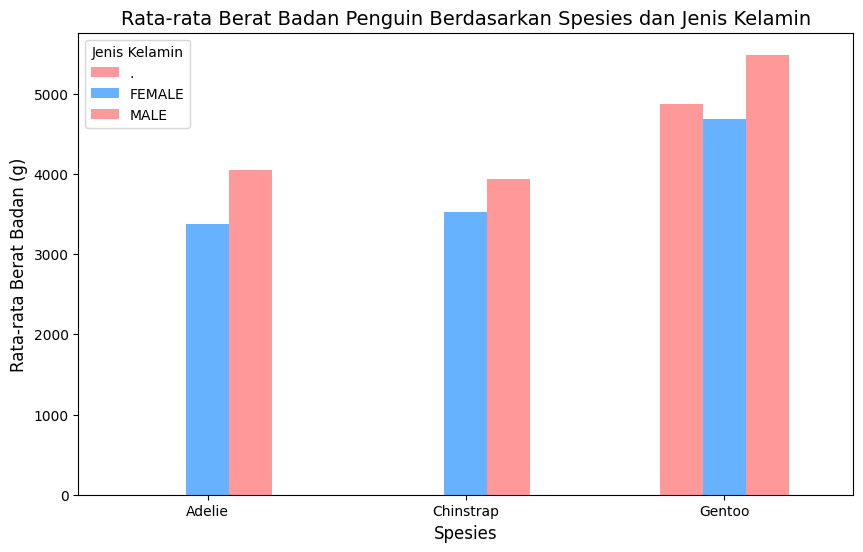

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata berat badan berdasarkan spesies dan jenis kelamin
avg_body_mass = df.groupby(['species', 'sex'])['body_mass_g'].mean().unstack()

# Membuat bar chart
avg_body_mass.plot(kind='bar', figsize=(10,6), color=['#FF9999','#66B2FF'])

# Menambahkan judul dan label
plt.title('Rata-rata Berat Badan Penguin Berdasarkan Spesies dan Jenis Kelamin', fontsize=14)
plt.xlabel('Spesies', fontsize=12)
plt.ylabel('Rata-rata Berat Badan (g)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Jenis Kelamin')
plt.show()

# jadi visualisasi ini menampilkan rata rata berat badan berdasarkan spesies dan jenis kelamin, dan gentoo memiliki rata rata berat badan yang paling tinggi dibandingkan spesies lainnya


8. Check unique value of our target variable

In [11]:
unique_sex_values = df['species'].unique()

# Menampilkan nilai unik
print(unique_sex_values)

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [12]:

label_encoder = LabelEncoder()

# Melakukan encoding pada kolom 'sex' dan mengganti isinya
df['sex'] = label_encoder.fit_transform(df['sex'].astype(str))

# Melakukan encoding pada kolom 'island' dan mengganti isinya
df['island'] = label_encoder.fit_transform(df['island'])

# Menampilkan dataframe dengan kolom yang baru
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


10. encode the target column and display the results

In [13]:
df['species'] = label_encoder.fit_transform(df['species'])

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


11. create a heatmap to see the correlation and explain the conclusion

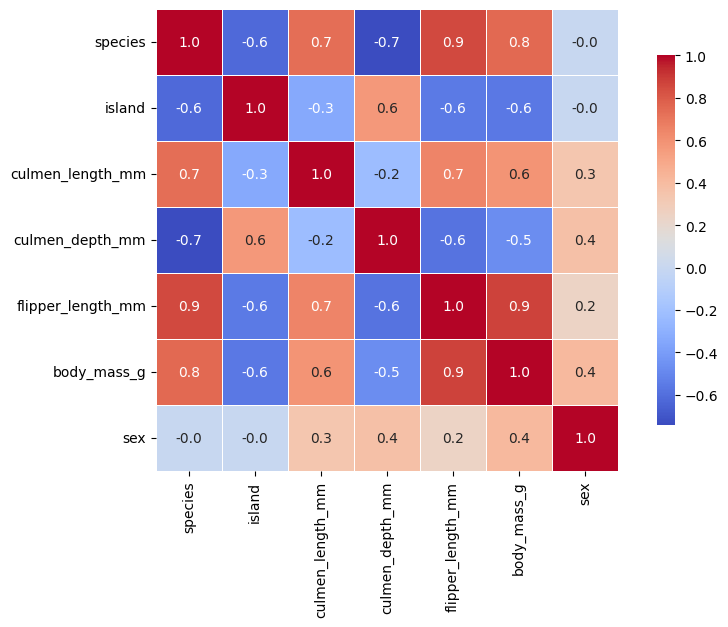

In [14]:
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', 
            linewidths=.5, square=True, cbar_kws={"shrink": .8})

# Menambahkan judul
plt.show()

## Machine Learning

1. Splitting X and y

In [36]:
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']



2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [37]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [38]:
# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape)

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [39]:
# Model Decision Tree dengan kriteria Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred_entropy = dt_entropy.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi untuk model dengan kriteria Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Akurasi (Entropy): {accuracy_entropy:.2f}")


Akurasi (Entropy): 0.99


In [43]:
train_accuracy_entropy = accuracy_score(y_train, dt_entropy.predict(X_train))
print(f"Akurasi pada data pelatihan (Entropy): {train_accuracy_entropy:.2f}")


Akurasi pada data pelatihan (Entropy): 1.00


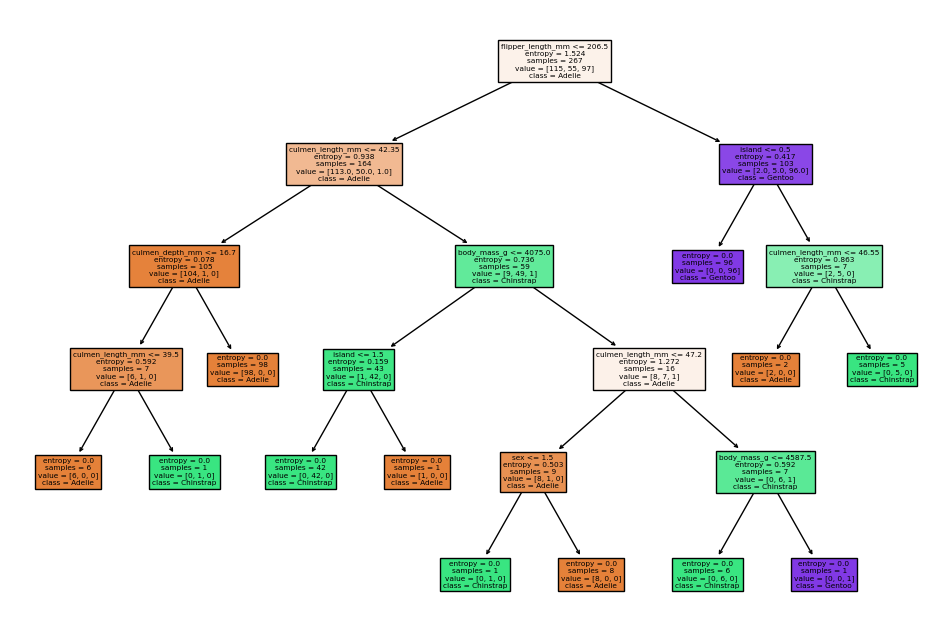

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plt.title("Decision Tree (Entropy)")
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

2. Criterion Gini index

In [23]:

# Model Decision Tree dengan kriteria Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred_gini = dt_gini.predict(X_test)

In [25]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Akurasi (Gini Index): {accuracy_gini:.2f}")

Akurasi (Gini Index): 1.00


In [26]:
train_accuracy_gini = accuracy_score(y_train, dt_gini.predict(X_train))
print(f"Akurasi pada data pelatihan (Gini Index): {train_accuracy_gini:.2f}")

Akurasi pada data pelatihan (Gini Index): 1.00


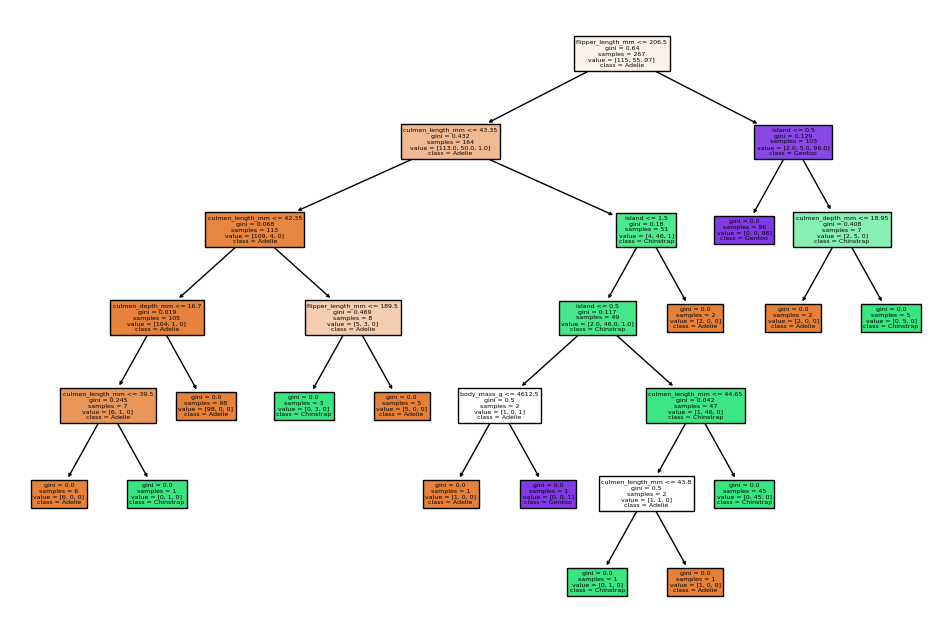

In [27]:
plt.figure(figsize=(12, 8))
plt.title("Decision Tree (Gini Index)")
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

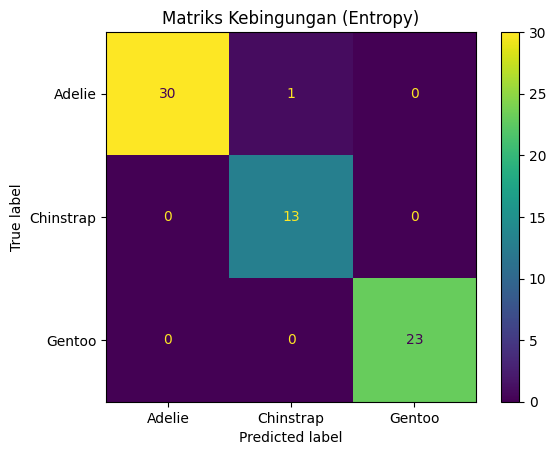

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriks kebingungan untuk model dengan kriteria Entropy
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
ConfusionMatrixDisplay(conf_matrix_entropy, display_labels=label_encoder.classes_).plot()
plt.title("Matriks Kebingungan (Entropy)")
plt.show()



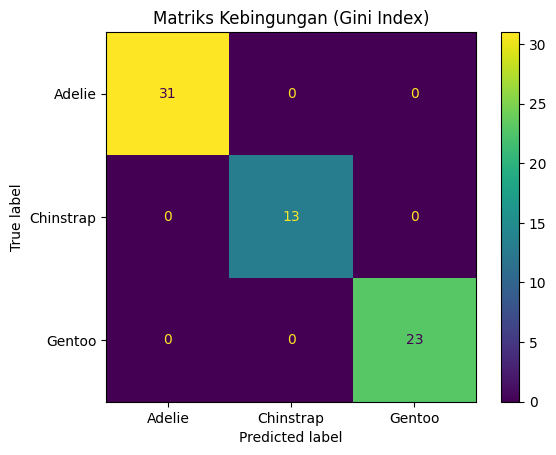

In [29]:
# Matriks kebingungan untuk model dengan kriteria Gini Index
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
ConfusionMatrixDisplay(conf_matrix_gini, display_labels=label_encoder.classes_).plot()
plt.title("Matriks Kebingungan (Gini Index)")
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Laporan klasifikasi untuk model dengan kriteria Entropy
print("Laporan Klasifikasi (Entropy):")
print(classification_report(y_test, y_pred_entropy, target_names=label_encoder.classes_))

# Laporan klasifikasi untuk model dengan kriteria Gini Index
print("Laporan Klasifikasi (Gini Index):")
print(classification_report(y_test, y_pred_gini, target_names=label_encoder.classes_))





Laporan Klasifikasi (Entropy):
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

Laporan Klasifikasi (Gini Index):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)


GaussianNB()

In [32]:
# Predict the results on the test set
y_pred = nb_model.predict(X_test)


In [33]:
# Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


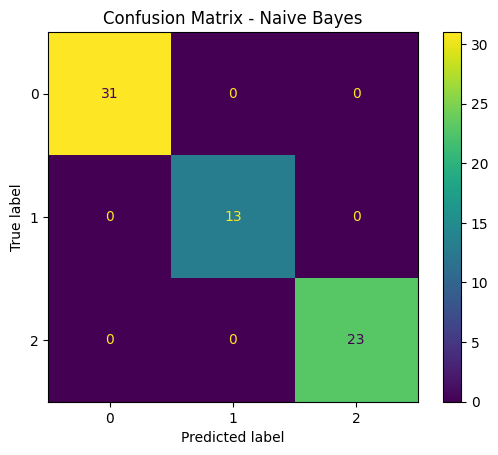

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [34]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [35]:
# So the result is it has a high accuracy with 100% accuracy, with 31 TP by using this model we will get a high accuracy.

Good Luck :)